## ML Algorithms, Part 3, Support Vector Machines

In this article we will investigate Support Vector Machines and their use for what is known as classification problems.

### Regression vs Classification

We have only seen regression so far, where we tried to predict a value (price of a house). Now we are trying to predict a category. The difference is that we can have \$146,389.35 or \$1,189.63 or \$9.71. In fact we can even have \$0.351 and it makes some sense (get 10 of the quantity and pay \$3.51). Questions in regression are answered with quantity estimations, "this much". Values are almost always continuous, certainly numeric. 

But with classification we ask a different class of questions, like "which" or "what". Which kind of bird is that? Who is the maker of this car? There is no in-between Ford and Toyota, and comparisons between the two don't make sense since a car cannot be more Toyota or more Ford (you would have to define other criteria, and then you would no longer have a classification problem).

### Support Vector classification: Maximal Margin Classifier

SVM classification works by finding an optimal separating hyperplane. Take a look at the Wikipedia image below (by the way, using the %%html magic is how you would use HTML code inside jupyter notebooks).

In [1]:
%%html
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/
Svm_separating_hyperplanes_%28SVG%29.svg/512px-Svm_separating_hyperplanes_%28SVG%29.svg.png">

The red line (H3) denotes the separating hyperplane. In 2D space like the picture shown above, a separating hyperplane is a line, while in 3D space the separating hyperplane would be a 2D surface. In N dimensions, the hyperplane would be (N-1) dimensional.

But how did we arrive at H3? As we said, we are searching for a line (hyperplace) that separates the two classes (white vs black dots) as best as it can. There are an infinite number of lines that can separate them, H1 and H2 are just two examples, but there is only 1 optimal separating line. This is the line that maximizes the distance between itself and the points in the two classes. It turns out that only the closest to the line points (or as they're more precisely called, *vectors*) matter; which we say "support" the line, and thus the name Support Vector Machines. This approach is called Maximal Margin Classifier. Considering this hyperplane is a line, it is defined by the following equation:

    b0 + b1*X1 + b2*X2 = 0
    
If this doesn't seem familiar, with some calculus you will see that it is the same as with Linear Regression, where Y = a\*X + b (for some slightly different a,b, and X = X1, Y = X2). The same applies to more dimensions, we just have the equivalent of a Multiple Linear Regression!

Some times however, we cannot (or don't want to, due to overfitting - but more on that later) find such a line or hyperplane that perfectly separates the two classes. In those cases we allow for a few missclassifications. For example, consider the two cases below, taken from the *Introduction to Statistical Learning* book. The first is easy to fit, and we're pretty satisfied with the results: the distance between the two classes seems big enough. In the second case, however, by adding just 1 point, the line changed a lot, and the margins are not very small. In cases like these, we will prefer the dashed line  (same as the original model) because although it fails to classify a point correctly, it provides a much bigger gap between the two classes.

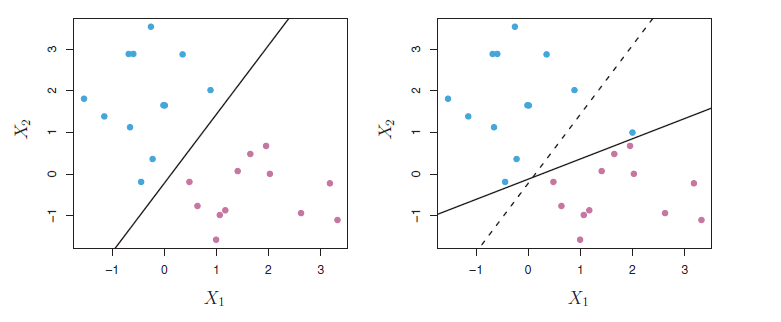

In [2]:
from PIL import Image
Image.open("ISLR_SVM_pic.png")

### Support Vector classification: Support Vector Machines

As we saw with Polynomial Regression, straight lines are not always enough to model the data. Consider the following example taken from the same book. Here, a linear boundary is just not good enough.

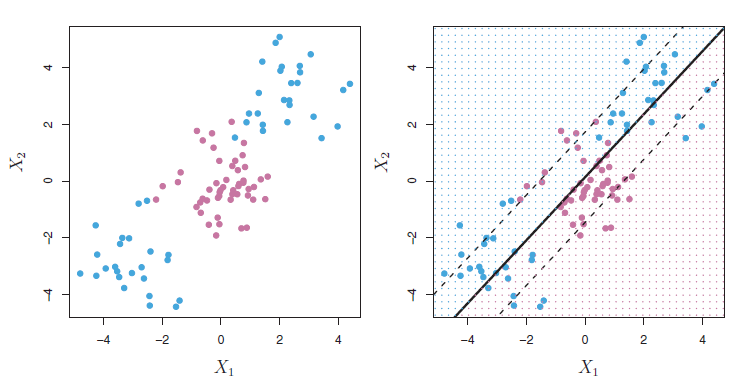

In [3]:
Image.open("ISLR_SVM_pic2.png")

#### Basis functions

Instead of relying on linear models, we can try circles, logarithms, exponentials, anything that our imagination (and math) permit. Enter *basis functions*. The Linear case is a basis function too, that uses a dot product, while some other functions (also known as "kernes") we will see relax this constraint and use more complex functions. There are two common alternatives: polynomial kernels (which are just like the polynomial features in polynomial regression) and radial kernels, which as the name implies approximately look like circles (using an exponent, a parameter gamma, and a norm, the math are too complex for the purposes of this article). 

The image is once again taken from ISLR book (yes, it is a great book, I highly suggest that you read it). On the left you can see a polynomial kernel being used, on the right you can see a radial kernel.

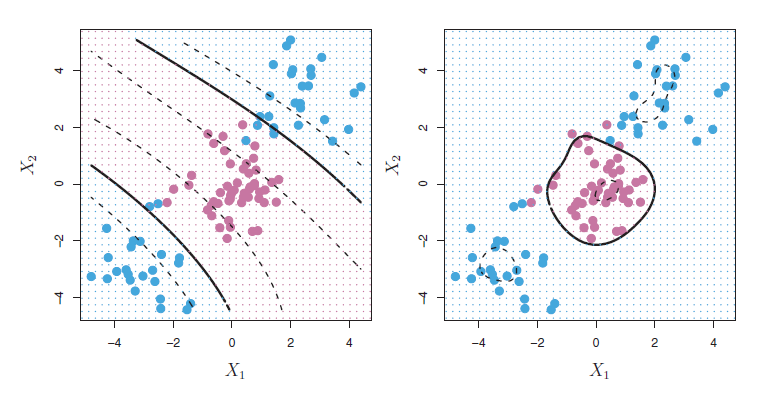

In [4]:
Image.open("ISLR_SVM_pic3.png")

### SVM in practice: MNIST

Let's use a very famous dataset that SVM have been shown to perform extremely well: MNIST. It contains pictures of 8x8 pixels that show number 0 to 9. The task is straighforward: find which digit appears in the picture. Let's load the data and take a look.

#### Imports and dataset review

In [5]:
from sklearn.svm import SVC # we need a Support Vector Classifier
from sklearn.metrics import classification_report, confusion_matrix # we need different metrics for classification
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.datasets import load_digits # this will load the MNIST dataset
from sklearn.model_selection import train_test_split # we will talk about this in detail

In [6]:
digits = load_digits()

data = digits.data
target = digits.target

# check shapes
# 1797 digits, with 64 pixels each (8x8)
data.shape, target.shape

((1797, 64), (1797,))

Remember how in the previous we talked about overfitting? The best way to detect overfitting is to test how our model performs on previously unseen data. That's why we split into two (or more) sets, train on one and evaluate on the other. You will soon see why this is important.

In [7]:
x_train, x_test, y_train, y_test = train_test_split(data, target)

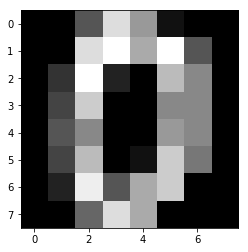

In [8]:
# visualize the first digit
# they are flattened so we need to reshape them
plt.imshow(data[0].reshape((8,8)), cmap='gray')

#### Define a model and fit it

The data are already in the format we want them, so a few lines of code are all it takes to define the classifier (although do keep in mind that these classes can be customized quite lot and there are many parameters to tune):

In [9]:
clf = SVC()

clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [10]:
print("Training set accuracy: {:.2f}%".format(clf.score(x_train, y_train)*100))

Training set accuracy: 100.00%


Here score denotes accuracy, as in the percentage of points that were classified correctly. We achieved 100% accuracy! But this is no time for celebration. We have fallen victims to overfitting. Here's how our model scores on data that it has not seen before:

In [11]:
print("Test set accuracy: {:.2f}%".format(clf.score(x_test, y_test)*100))

Test set accuracy: 44.44%


A gloomy 44% accuracy (although yours might differ a little, depending on the random split). What can we do to fix that? We can try different parameters. There are infinite combinations, and you can spend days trying to figure them out on yourself, or you can try searching for them using cross validation, grid search, randomization, gradient descent, or other techniques. These are not discussed here. Here is a value that seems to be performing well, achieving steadily >98% accuracy, and we only need to change the gamma parameter:

In [12]:
clf = SVC(gamma=0.00075)

clf.fit(x_train, y_train)

print("Training set accuracy: {:.2f}%".format(clf.score(x_train, y_train)*100))
print("Test set accuracy: {:.2f}%".format(clf.score(x_test, y_test)*100))

Training set accuracy: 99.78%
Test set accuracy: 99.33%
